In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
from google.colab import files
uploaded = files.upload()

Saving food allergy data.csv to food allergy data (1).csv


In [4]:
# Load and preprocess data
df = pd.read_csv('food allergy data.csv')

<ipython-input-5-95b454ab03f9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')
<ipython-input-5-95b454ab03f9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Allergy', y='SpecificIgE', palette='Set3')


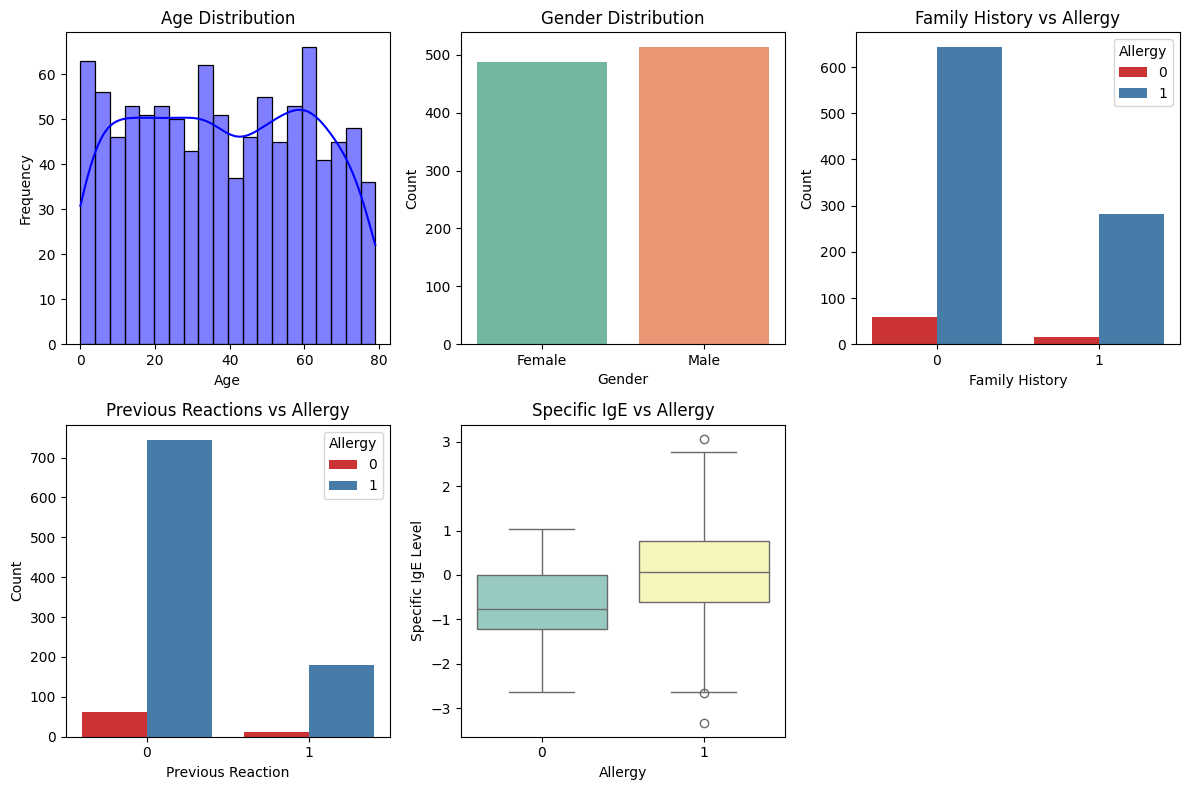

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
# Visualizations
plt.figure(figsize=(12, 8))

# Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gender Distribution
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Family History and Allergy
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='FamilyHistory', hue='Allergy', palette='Set1')
plt.title('Family History vs Allergy')
plt.xlabel('Family History')
plt.ylabel('Count')

# Previous Reactions and Allergy
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='PreviousReaction', hue='Allergy', palette='Set1')
plt.title('Previous Reactions vs Allergy')
plt.xlabel('Previous Reaction')
plt.ylabel('Count')

# Specific IgE and Allergy
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Allergy', y='SpecificIgE', palette='Set3')
plt.title('Specific IgE vs Allergy')
plt.xlabel('Allergy')
plt.ylabel('Specific IgE Level')

plt.tight_layout()
plt.show()

In [7]:
# Handle categorical feature 'Gender' using one-hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')  # Create OneHotEncoder object
gender_encoded = ohe.fit_transform(df[['Gender']]).toarray()  # Fit and transform 'Gender' column

# Create a DataFrame from the encoded features
gender_df = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

# Drop the original 'Gender' column and concatenate the encoded features
data = df.drop('Gender', axis=1)
data = pd.concat([data, gender_df], axis=1)

# Correct the column name if needed (e.g., if it's 'Allergy')
X = data.drop('Allergy', axis=1).values  # Replace 'Allergy' with the actual column name if different
y = data['Allergy'].values  # Replace 'Allergy' with the actual column name if different

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/50
20/20 [==============================] - 2s 54ms/step - loss: 0.4651 - accuracy: 0.9125 - val_loss: 0.3214 - val_accuracy: 0.9438
Epoch 2/50
20/20 [==============================] - 0s 10ms/step - loss: 0.2899 - accuracy: 0.9203 - val_loss: 0.2197 - val_accuracy: 0.9438
Epoch 3/50
20/20 [==============================] - 0s 17ms/step - loss: 0.2368 - accuracy: 0.9203 - val_loss: 0.1839 - val_accuracy: 0.9438
Epoch 4/50
20/20 [==============================] - 0s 15ms/step - loss: 0.2108 - accuracy: 0.9203 - val_loss: 0.1637 - val_accuracy: 0.9438
Epoch 5/50
20/20 [==============================] - 0s 21ms/step - loss: 0.1902 - accuracy: 0.9203 - val_loss: 0.1471 - val_accuracy: 0.9438
Epoch 6/50
20/20 [==============================] - 0s 13ms/step - loss: 0.1727 - accuracy: 0.9203 - val_loss: 0.1308 - val_accuracy: 0.9438
Epoch 7/50
20/20 [==============================] - 0s 12ms/step - loss: 0.1563 - accuracy: 0.9203 - val_loss: 0.1157 - val_accuracy: 0.9438
Epoch 8/50
20

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


7/7 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[ 11   4]
 [  0 185]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.98      1.00      0.99       185

    accuracy                           0.98       200
   macro avg       0.99      0.87      0.92       200
weighted avg       0.98      0.98      0.98       200



7/7 [==============================] - 0s 4ms/step


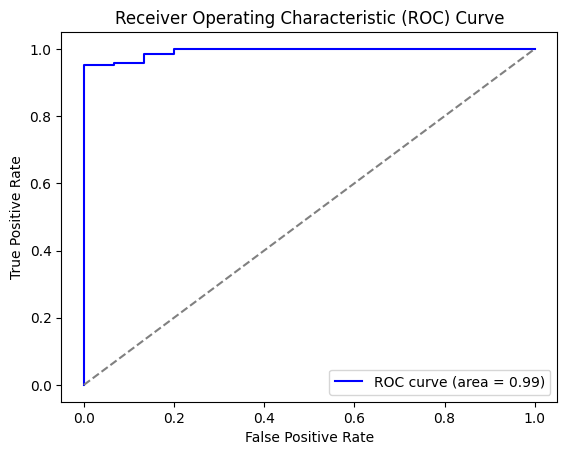

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Hyperparameter Tuning**

GridSearchCV or RandomizedSearchCV: To find the best hyperparameters for your model

In [15]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
param_grid = {'batch_size': [10, 20, 30],
              'epochs': [50, 100],
              'optimizer': ['adam', 'rmsprop']}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'